Submitted by:
<br>Prottoy Kumar Prodhan Joy
<br>Department of Statistics 
<br>University of Chittagong, Chittagong, Bangladesh

#### Objectives:
- Supervised Learning: Linear Regression
- Perform One-hot encoding
- Accuracy metric in Regression problem


**Import required Libraries**

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [3]:
# read the hyundai.csv file 
df=pd.read_csv('hyundai.csv')
# check random 5 rows
display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
1446,I30,2019,14990,Manual,1247,Petrol,45.6,1.0
229,I800,2017,15985,Automatic,35154,Diesel,33.6,2.5
2384,I10,2018,8995,Manual,16048,Petrol,57.7,1.2
3178,Tucson,2018,14995,Manual,8867,Petrol,44.8,1.6
2052,I30,2016,7500,Manual,51236,Diesel,72.4,1.6


In [4]:
# find the number of rows and columns present in the dataframe
df.shape

(4860, 8)

In [5]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         4860 non-null   object 
 1   year          4860 non-null   int64  
 2   price         4860 non-null   int64  
 3   transmission  4860 non-null   object 
 4   mileage       4860 non-null   int64  
 5   fuelType      4860 non-null   object 
 6   mpg           4860 non-null   float64
 7   engineSize    4860 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 303.9+ KB


So, there are 8 columns. Among them price is the target variable and others are feature variables.

In [6]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [7]:
len(df['model'].unique())

16

In [8]:
len(df['transmission'].unique())

4

In [9]:
len(df['fuelType'].unique())

4

**Separating the features and target variable**

In [10]:
# Here price is the target variable
# And, rest are feature variables
X = df.drop('price', axis=1)
y = df[['price']]

print(X.shape, y.shape)

(4860, 7) (4860, 1)


In [11]:
# check first 5 rows of the 'X' dataframe
display(X.head(5))

,model,year,transmission,mileage,fuelType,mpg,engineSize
0,I20,2017,Manual,17307,Petrol,58.9,1.2
1,Tucson,2016,Automatic,25233,Diesel,43.5,2.0
2,Tucson,2016,Manual,37877,Diesel,61.7,1.7
3,I10,2016,Manual,23789,Petrol,60.1,1.0
4,IX35,2015,Manual,33177,Diesel,51.4,2.0


In [12]:
# check first 5 rows of the 'y' dataframe
display(y.head(5))

,price
0,7999
1,14499
2,11399
3,6499
4,10199


**One-hot encoding**

In [13]:
# Convert categorical variable into dummy variables.
categoricals=['model','transmission','fuelType']
X=pd.get_dummies(X,columns=categoricals,drop_first=True)

In [14]:
X.shape

(4860, 25)

In [15]:
X.columns

Index(['year', 'mileage', 'mpg', 'engineSize', 'model_ Amica', 'model_ Getz',
       'model_ I10', 'model_ I20', 'model_ I30', 'model_ I40', 'model_ I800',
       'model_ IX20', 'model_ IX35', 'model_ Ioniq', 'model_ Kona',
       'model_ Santa Fe', 'model_ Terracan', 'model_ Tucson',
       'model_ Veloster', 'transmission_Manual', 'transmission_Other',
       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

In [16]:
display(X.head(10))

,year,mileage,mpg,engineSize,model_ Amica,model_ Getz,model_ I10,model_ I20,model_ I30,model_ I40,...,model_ Santa Fe,model_ Terracan,model_ Tucson,model_ Veloster,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,17307,58.9,1.2,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2016,25233,43.5,2.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2016,37877,61.7,1.7,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2016,23789,60.1,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2015,33177,51.4,2.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,2015,41650,60.1,1.0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,2015,39547,55.4,1.2,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
7,2016,30300,57.6,1.7,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2018,38082,51.4,1.4,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,2016,21014,61.7,1.7,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


Here, One-hot encoding is better than label encoding. Because we are dealing with nominal categorical variables. Here the categories don't have any numeric odering in between them. 

**Create train and test set**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

**Linear Regression**

In [18]:
model=LinearRegression()
model=model.fit(X_train,y_train)

In [19]:
# find estimated coefficients
model.coef_ 

array([[ 9.66731913e+02, -6.98840656e-02, -8.46516305e+01,
         2.62423931e+03,  1.27329258e-11, -2.08806286e+03,
        -9.05019741e+03, -7.98923056e+03, -5.77752058e+03,
        -6.25149094e+03, -7.45819632e+03, -8.81605670e+03,
        -6.33556939e+03, -6.07797410e+03, -4.73416010e+03,
         1.40562932e+03, -2.80275641e+03, -4.48046881e+03,
        -6.78773022e+03, -8.68542815e+02, -8.82814205e+02,
         1.17458839e+03,  4.53911142e+03,  3.38132642e+03,
        -8.87035797e+02]])

In [20]:
features=X.columns
pd.DataFrame({'features':features,'coefficients': np.squeeze(model.coef_ )})

,features,coefficients
0,year,9.667319e+02
1,mileage,-6.988407e-02
2,mpg,-8.465163e+01
3,engineSize,2.624239e+03
4,model_ Amica,1.273293e-11
5,model_ Getz,-2.088063e+03
6,model_ I10,-9.050197e+03
7,model_ I20,-7.989231e+03
8,model_ I30,-5.777521e+03
9,model_ I40,-6.251491e+03


A positive sign indicates that as the feature variable increases, the target variable also increases.
A negative sign indicates that as the feature variable increases, the target variable decreases.

In [21]:
# find intercept
model.intercept_

array([-1928132.73246704])

**Prediction**

In [22]:
y_pred=model.predict(X_test)
print(y_pred)

[[19968.47271526]
 [18293.27830399]
 [ 8788.01865773]
 [16821.27535271]
 [21088.87968878]
 [ 9842.1156166 ]
 [ 9567.10156939]
 [12001.06583261]
 [ 8457.53225227]
 [25272.23134731]
 [10617.6860969 ]
 [19182.4389043 ]
 [14960.01411888]
 [11056.6083912 ]
 [ 9690.39442987]
 [10010.94347481]
 [ 6755.35811249]
 [ 9798.50369322]
 [15291.15407783]
 [ 4345.03665193]
 [10405.48643139]
 [16356.8860789 ]
 [ 5552.8095529 ]
 [13591.62214556]
 [14314.3112208 ]
 [ 8292.2640433 ]
 [ 9870.4284125 ]
 [ 3681.62721677]
 [ 5470.54379761]
 [16521.59114075]
 [14803.18866755]
 [ 6255.84325328]
 [14048.72029486]
 [12729.22817575]
 [11984.16686335]
 [ 9799.47971376]
 [13134.84636844]
 [28535.24057554]
 [18147.69232059]
 [ 7770.62079696]
 [15150.47066928]
 [15244.18520131]
 [14814.20037758]
 [ 9638.82825387]
 [ 7418.68464238]
 [28588.19621666]
 [10546.15638457]
 [15070.71410166]
 [ 9241.79616058]
 [10535.30596471]
 [11724.63017469]
 [ 7271.29914793]
 [10354.77515852]
 [12366.0545155 ]
 [ 7745.75509079]
 [22095.08

In [23]:
# check actual prices
y_true=y_test
print(y_true)

      price
2186  17990
3351  17150
2651   7040
2104  16990
3811  25000
...     ...
829    6995
1479  14750
2534  18200
2029  13690
2266  17599

[972 rows x 1 columns]


**Prediction Error**

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.


Formula to calculate mae

MSE = (1/n) * Σ(actual – forecast)**2

In [24]:
# find the value of Mean squared error
mse=mean_squared_error(y_true,y_pred)
print('mean squared error: ',mse)

mean squared error:  11651158.37731878


Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

In [25]:
# find the value of Root mean squared error
rmse=np.sqrt(mean_squared_error(y_true,y_pred))
print('root mean squared error: ',rmse)

root mean squared error:  3413.379319284451


The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.



Formula to calculate mae

MAE = (1/n) * Σ|actual – forecast| 

In [26]:
# find the value of Mean absolute error
mae=mean_absolute_error(y_true,y_pred)
print('mean absolute error: ',mae)

mean absolute error:  1576.2432004061


The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

Formula to calculate R-squared

R
2
=1
−
∑
(
y
i
−
^
y
i
)
2
∑
(
y
i
−
¯
y
)
2
.


In [27]:
# find the value of Coefficient of determination
r_squared=r2_score(y_true,y_pred)
print('r_squared: ',r_squared)

r_squared:  0.7004647783857324


The mean absolute percentage error (MAPE) is a metric that tells us how far apart our predicted values are from our observed values in a regression analysis, on average.

Formula to calculate mape

MAPE = (1/n) * Σ(|actual – forecast| / |actual|) * 100

In [28]:
# find the value of Mean absolute percentage error manually
mape=np.mean(np.abs((y_true-y_pred)/y_true))*100
print('mean absolute percentage error: ',mape)

mean absolute percentage error:  price    13.506574
dtype: float64


We know that the smaller the mse, rmse, mae, the closer we are to finding the line of best fit. On the other hand, a higher R2 indicates a better fit for the model

Here, coefficient of determination is .535 means 53.5% of the dependent variable is predicted by the independent variable. So, the model isn't highly reliable model for future forecasts.

<ipython-input-29-1b8fde3b9f78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['pred'] = y_pred
<ipython-input-29-1b8fde3b9f78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()


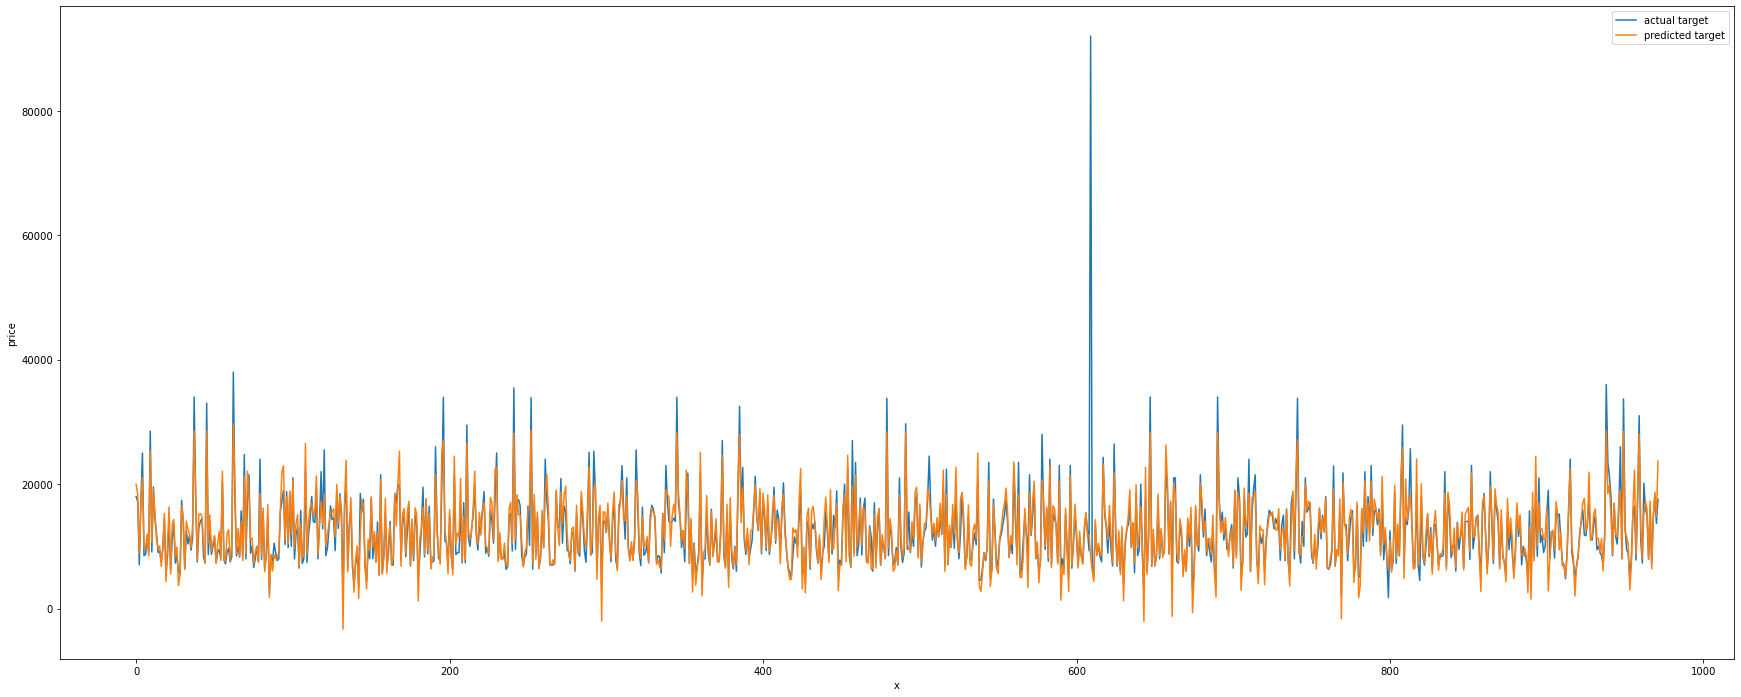

In [29]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

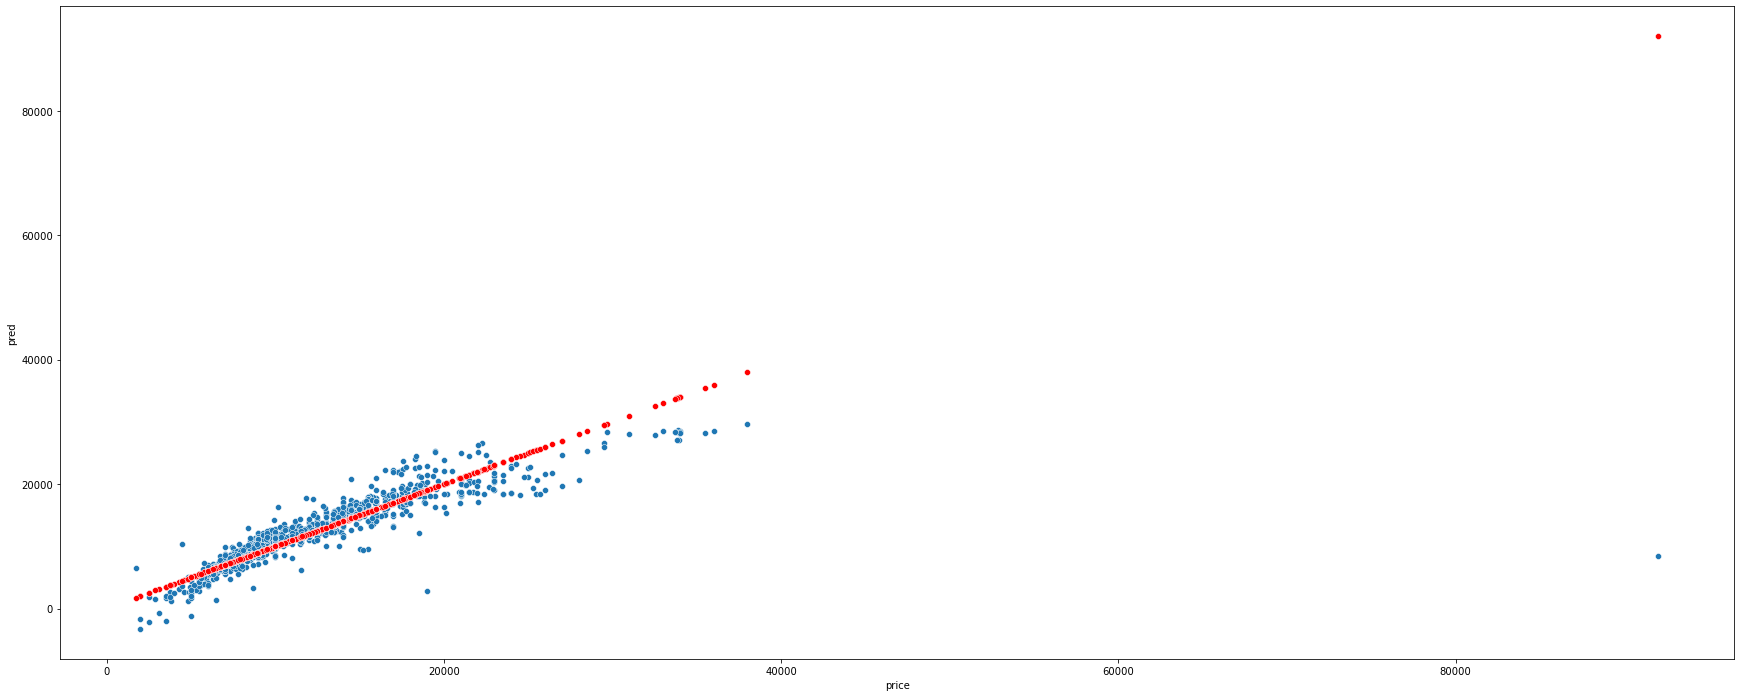

In [30]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()